## Reading the file

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.0f}'.format)
# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/atharvavyas/Desktop/McGill Academics/AU24/INSY 662/Project/Fire Incidents Data.csv')

# Display the first few rows of the DataFrame
df.head()


/var/folders/vv/lxk5p8wx097gv6r501nn13tw0000gn/T/ipykernel_97426/1946812482.py:9: DtypeWarning: Columns (1,2,3,9,10,12,13,14,15,16,18,24,26,27,30,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/atharvavyas/Desktop/McGill Academics/AU24/INSY 662/Project/Fire Incidents Data.csv')


,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,3399984,990 - Under Investigation,01 - Normal (no change),5 - May not resume operations,0,0,"50,000,000",800,NaN,2019-05-07T03:34:02,...,99 - Reason for inoperation undetermined,9 - Type undetermined,9 - Undetermined,8 - Entire Structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,3 - Fire with smoke showing only - including v...,2019-05-07T03:24:09,2019-05-07T03:29:48,0
1,3420340,99 - Undetermined (formerly 98),03 - Under Construction,1 - No business interruption,0,0,"15,000,000",0,NaN,2021-10-05T22:06:54,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,9 - Undetermined,10 - Spread beyond building of origin,9 - Activation/operation undetermined,9 - Undetermined,"7 - Fully involved (total structure, vehicle, ...",2021-10-05T21:59:32,2021-10-05T22:05:39,0
2,3411787,83 - Electrical Systems,08 - Not Applicable,9 - Undetermined,0,0,"13,000,000",0,NaN,2011-03-18T17:05:00,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,9 - Unclassified,2011-03-18T16:49:47,2011-03-18T16:55:59,0
3,3411482,50 - Basement/cellar (not partitioned),01 - Normal (no change),9 - Undetermined,0,0,"10,000,000",0,NaN,2017-02-11T05:18:09,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",8 - Entire Structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,3 - Fire with smoke showing only - including v...,2017-02-11T05:07:31,2017-02-11T05:12:13,0
4,3411499,"52 - HVAC Equipment Room (furnace room, water ...",01 - Normal (no change),5 - May not resume operations,0,0,"10,000,000",100,NaN,2017-02-14T09:29:00,...,98 - Not applicable: Alarm operated OR presenc...,4 - Interconnected,1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,9 - Undetermined,2 - Fire with no evidence from street,2017-02-14T09:22:30,2017-02-14T09:26:23,0


In [2]:
# Average response time

### Checking unqiue values in each column

In [3]:
# Check unique and null values for all columns
unique_values = df.nunique()
null_values = df.isnull().sum()

# Display the results
for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique values: {unique_values[column]}")
    print(f"Null values: {null_values[column]}")
    print("-" * 40)

Column: _id
Unique values: 32929
Null values: 0
----------------------------------------
Column: Area_of_Origin
Unique values: 74
Null values: 9002
----------------------------------------
Column: Building_Status
Unique values: 7
Null values: 16062
----------------------------------------
Column: Business_Impact
Unique values: 7
Null values: 16066
----------------------------------------
Column: Civilian_Casualties
Unique values: 10
Null values: 7133
----------------------------------------
Column: Count_of_Persons_Rescued
Unique values: 23
Null values: 223
----------------------------------------
Column: Estimated_Dollar_Loss
Unique values: 267
Null values: 8979
----------------------------------------
Column: Estimated_Number_Of_Persons_Displaced
Unique values: 64
Null values: 16065
----------------------------------------
Column: Exposures
Unique values: 8
Null values: 25418
----------------------------------------
Column: Ext_agent_app_or_defer_time
Unique values: 23908
Null values

### Checking for duplicates

In [4]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows

Number of duplicate rows: 0


,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties


In [5]:
# Get the unique values of the 'Area_of_Origin' column
area_of_origin_values = df['Area_of_Origin'].unique()

# Check value counts for each unique value and order in descending order
value_counts = df['Area_of_Origin'].value_counts().sort_values(ascending=False)
value_counts.head(10)

Area_of_Origin
24 - Cooking Area or Kitchen                                             4076
81 - Engine Area                                                         2991
44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri    1600
64 - Porch or Balcony                                                    1520
22 - Sleeping Area or Bedroom (inc. patients room, dormitory, etc)       1313
21 - Living Area (e.g. living, TV, recreation, etc)                       920
75 - Trash, rubbish area (outside)                                        710
99 - Undetermined  (formerly 98)                                          683
97 - Other - unclassified                                                 632
42 - Garage                                                               610
Name: count, dtype: int64

## Note the highest percentage of cases of fire

In [6]:
# Calculate the percentage of each unique value in the 'Area_of_Origin' column
percentages = df['Area_of_Origin'].value_counts(normalize=True) * 100

# Display the percentages
percentages.head(10)  # Display the top 10 percentages

Area_of_Origin
24 - Cooking Area or Kitchen                                            17
81 - Engine Area                                                        13
44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri    7
64 - Porch or Balcony                                                    6
22 - Sleeping Area or Bedroom (inc. patients room, dormitory, etc)       5
21 - Living Area (e.g. living, TV, recreation, etc)                      4
75 - Trash, rubbish area (outside)                                       3
99 - Undetermined  (formerly 98)                                         3
97 - Other - unclassified                                                3
42 - Garage                                                              3
Name: proportion, dtype: float64

#### Checking the type of building where the fire occurred

In [7]:
building_status_counts = df['Building_Status'].value_counts()
print(building_status_counts)

Building_Status
01 - Normal (no change)               14668
08 - Not Applicable                     978
02 - Under Renovation                   704
03 - Under Construction                 231
09 - Undetermined                       139
05 - Abandoned, vacant (long term)      127
04 - Under Demolition                    20
Name: count, dtype: int64


### If the building is not Normal, then how does fire incident occurs? (It couldn't be due to kitchen, right?)

In [8]:
# Filter the DataFrame for rows where Building_Status is not '01 - Normal (no change)'
filtered_df = df[df['Building_Status'] != '01 - Normal (no change)']

# Get the value counts for the 'Area_of_Origin' column in the filtered DataFrame
filtered_area_of_origin_counts = filtered_df['Area_of_Origin'].value_counts()

# Display the results
filtered_area_of_origin_counts.head(10)


Area_of_Origin
81 - Engine Area                                                         2864
44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri     627
99 - Undetermined  (formerly 98)                                          556
75 - Trash, rubbish area (outside)                                        509
83 - Electrical Systems                                                   437
97 - Other - unclassified                                                 430
86 - Passenger Area                                                       410
89 - Other Vehicle Area                                                   366
79 - Other Outside Area                                                   341
71 - Open Area (inc lawn, field, farmyard, park, playing field, pier,     325
Name: count, dtype: int64

### This will help us to know the extent of damage that happened due to fire incident at a business site

In [9]:
# Get the value counts for the 'Business_Impact' column
business_impact_counts = df['Business_Impact'].value_counts()

# Display the results
print(business_impact_counts)

Business_Impact
8 - Not applicable (not a business)         7619
1 - No business interruption                6849
9 - Undetermined                            1166
2 - May resume operations within a week      894
3 - May resume operations within a month     197
5 - May not resume operations                 87
4 - May resume operations within a year       51
Name: count, dtype: int64


In [10]:
# Get the value counts for the 'Business_Impact' column
business_impact_counts = df['Business_Impact'].value_counts(normalize=True)*100

# Display the results
print(business_impact_counts)

Business_Impact
8 - Not applicable (not a business)        45
1 - No business interruption               41
9 - Undetermined                            7
2 - May resume operations within a week     5
3 - May resume operations within a month    1
5 - May not resume operations               1
4 - May resume operations within a year     0
Name: proportion, dtype: float64


# Check unique values of Civilian_Casualties
unique_civilian_casualties = df['Civilian_Casualties'].unique()
print(f"Unique values of Civilian Casualties: {unique_civilian_casualties}")

# Perform descriptive analysis on Civilian_Casualties
descriptive_analysis = df['Civilian_Casualties'].value_counts()
print("\nDescriptive Analysis of Civilian Casualties:")
print(descriptive_analysis)



In [11]:
# Check the total number of deaths
total_deaths = df['Civilian_Casualties'].sum()
print(f"Total number of deaths till date: {total_deaths}")

# Find the worst case where the maximum number of people died
worst_case = df[df['Civilian_Casualties'] == df['Civilian_Casualties'].max()]
print("\nWorst case where maximum number of people died:")
worst_case

Total number of deaths till date: 1798.0

Worst case where maximum number of people died:


,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
75,3411114,"12 - Hallway, Corridor",01 - Normal (no change),1 - No business interruption,15,6,"1,000,000",50,NaN,2016-02-05T15:30:00,...,98 - Not applicable: Alarm operated OR presenc...,4 - Interconnected,2 - Some persons (at risk) self evacuated as a...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,3 - Fire with smoke showing only - including v...,2016-02-05T15:03:38,2016-02-05T15:08:01,0


## Created New Coulmns to get the Hour, Month and Day of the Week of the fire incident alarm time


In [12]:
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])
time=df['TFS_Alarm_Time'].iloc[0]
df['Year'] = df['TFS_Alarm_Time'].apply(lambda time:time.year)
df['Hour']=df['TFS_Alarm_Time'].apply(lambda time:time.hour)
df['Month']=df['TFS_Alarm_Time'].apply(lambda time:time.month)
df['Day of Week']=df['TFS_Alarm_Time'].apply(lambda time:time.dayofweek)
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)


Top months with fire incidents

In [13]:
months = df.groupby(by=['Month']).count()['_id'].sort_values(ascending=False)
months.head(12)

Month
5     3568
7     3343
6     3333
4     2854
8     2757
3     2667
9     2634
10    2572
11    2523
12    2373
1     2291
2     2014
Name: _id, dtype: int64

In [14]:
%matplotlib inline

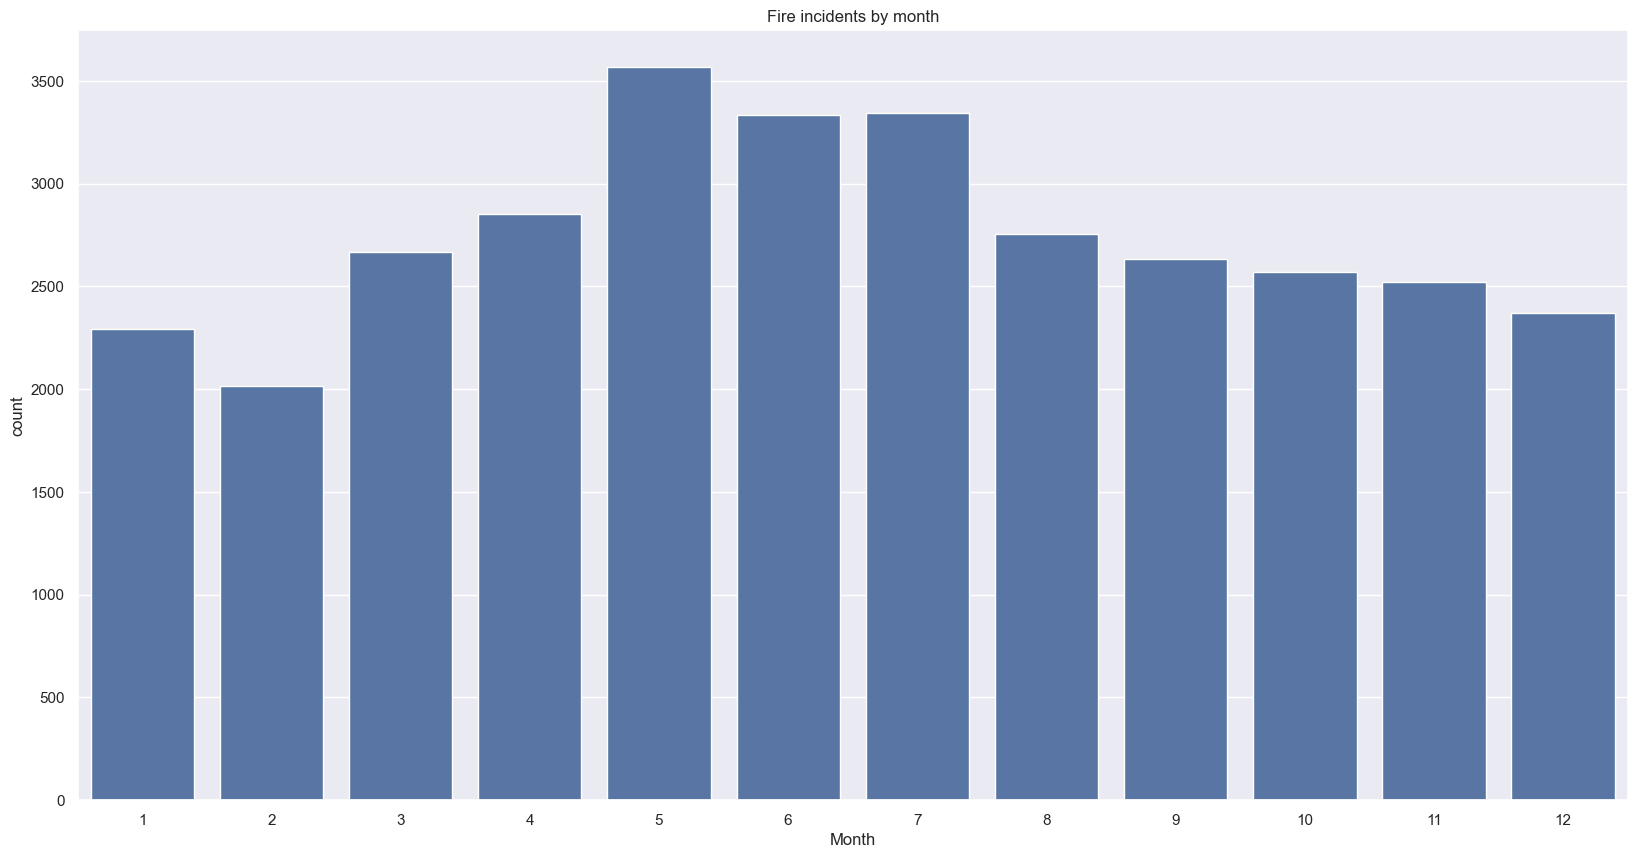

In [15]:
import matplotlib.pyplot as plt

# Set figure size
sns.set(rc={'figure.figsize':(20,10)})

# Create count plot
sns.countplot(x='Month', data=df)
plt.title("Fire incidents by month")
# Show plot (important for non-interactive environments)
plt.show()


Text(0.5, 1.0, 'Average Response Time by Incident Station Area')

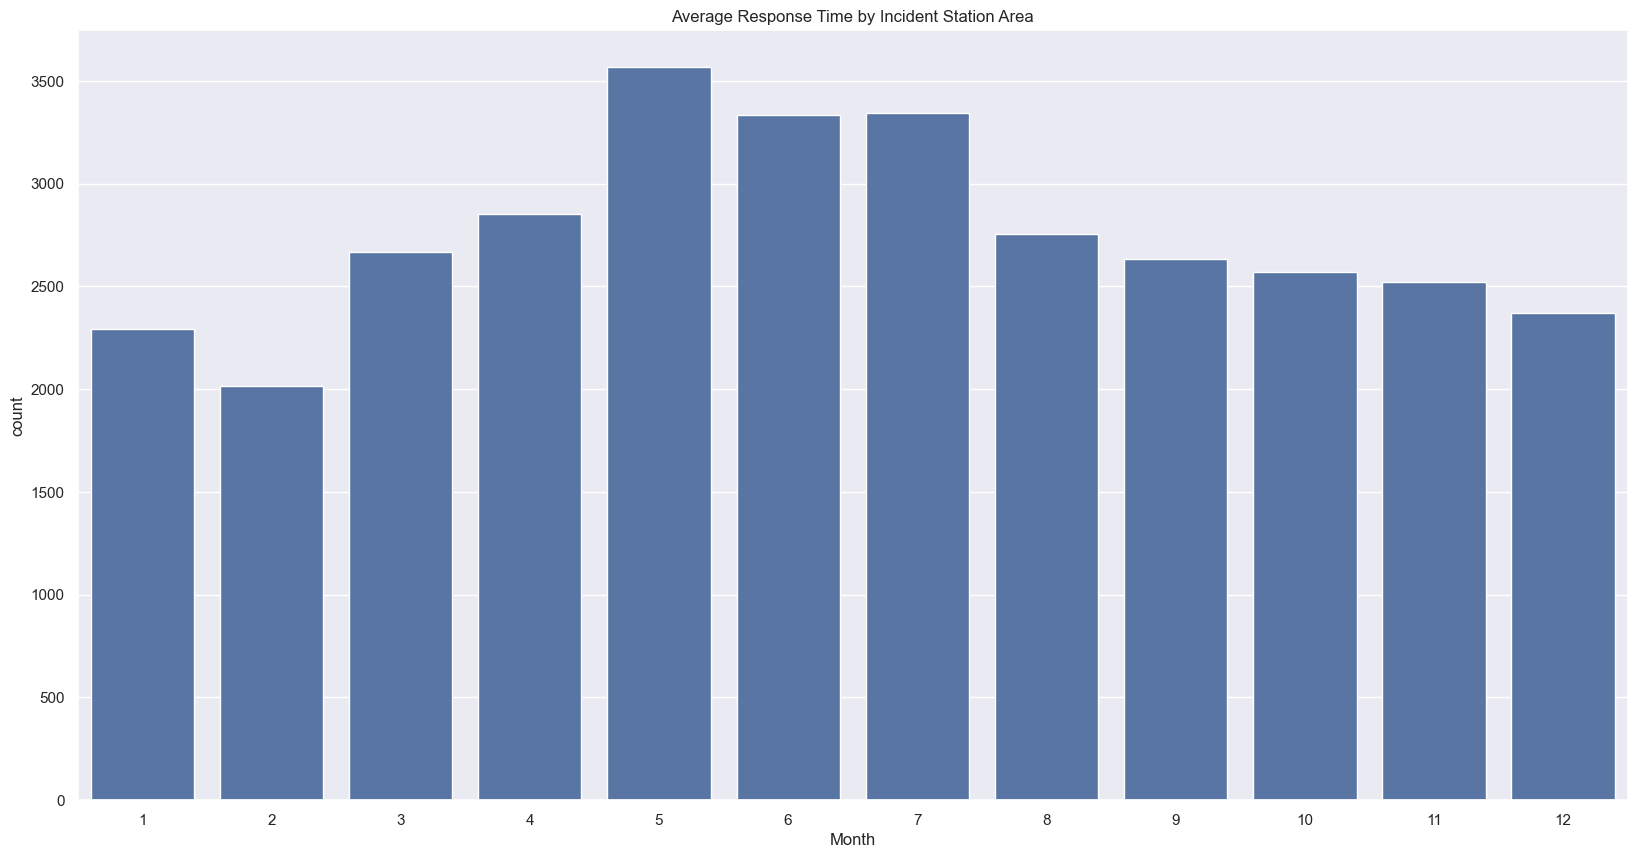

In [16]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Month',data=df)
plt.title('Average Response Time by Incident Station Area')

/var/folders/vv/lxk5p8wx097gv6r501nn13tw0000gn/T/ipykernel_97426/3724536196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day of Week',data=df,palette='inferno')


Text(0.5, 1.0, 'Fire incidents by days of the week')

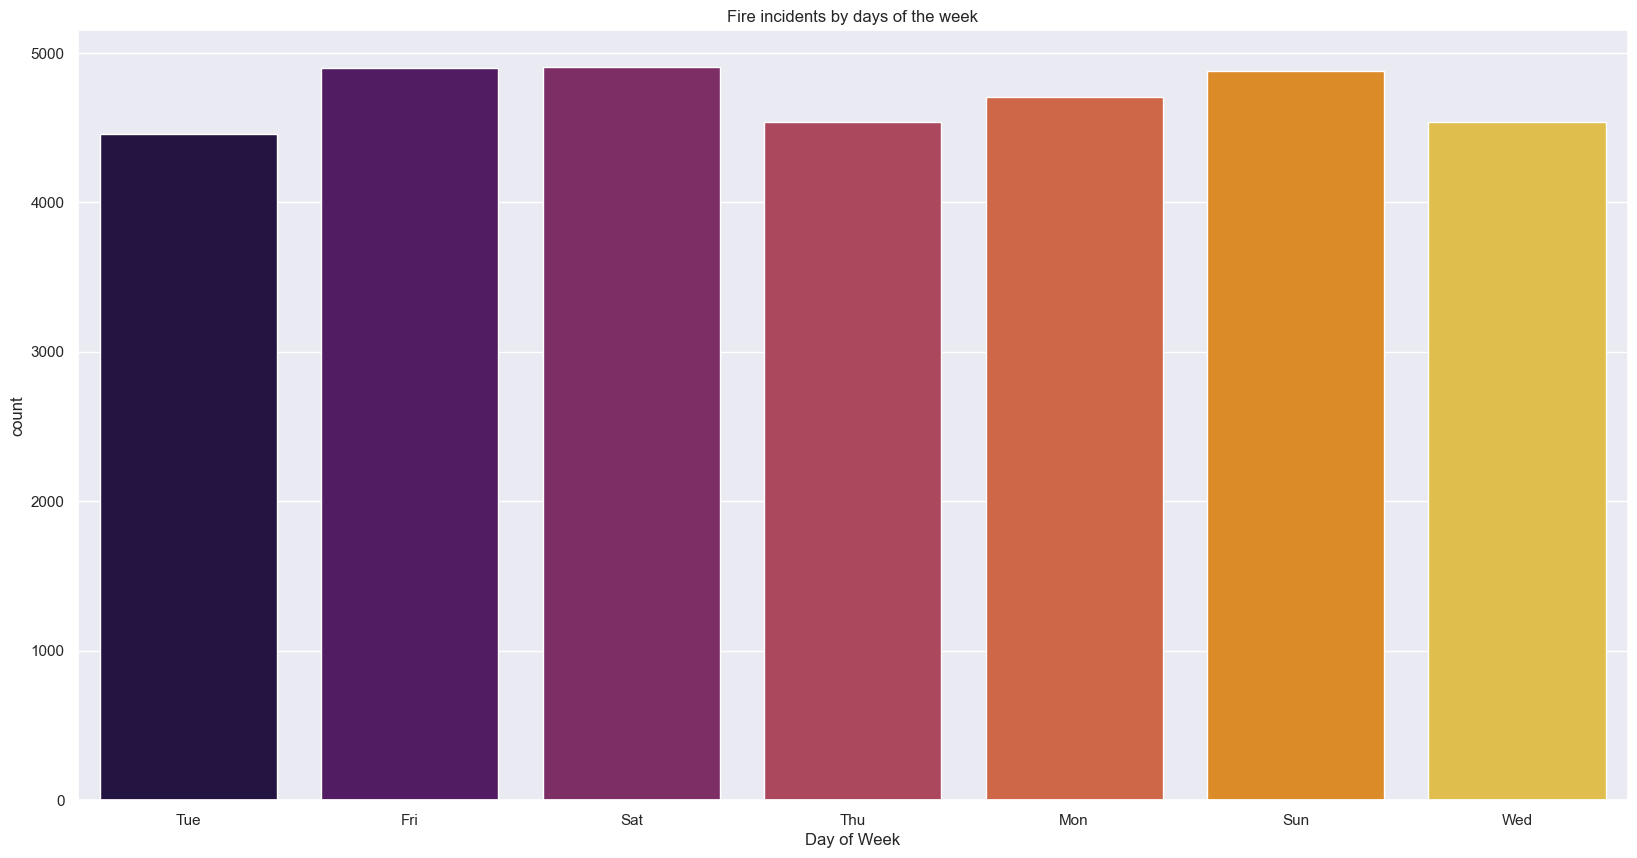

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Day of Week',data=df,palette='inferno')
plt.title("Fire incidents by days of the week")

/var/folders/vv/lxk5p8wx097gv6r501nn13tw0000gn/T/ipykernel_97426/3784051825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year',data=df,palette='inferno')


<Axes: xlabel='Year', ylabel='count'>

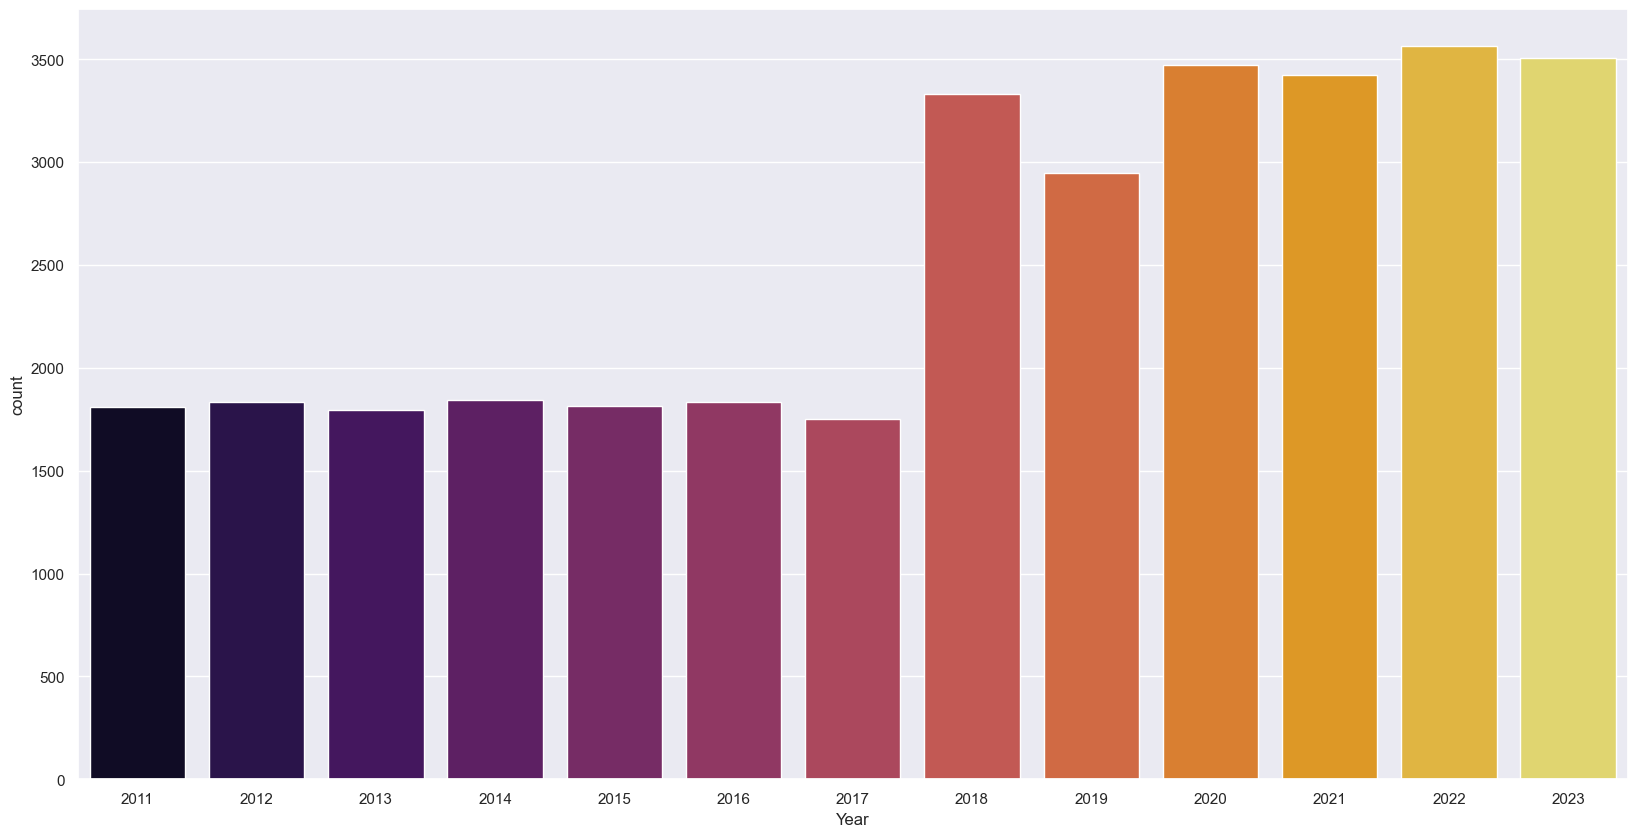

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Year',data=df,palette='inferno')

Fire incident counts by day of the week and hour

In [19]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['_id'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,168,154,153,137,104,105,110,122,117,164,...,266,277,300,296,281,280,292,279,269,203
Mon,153,149,143,105,94,104,114,138,171,139,...,235,269,282,251,296,254,277,244,253,249
Sat,199,177,152,137,128,123,124,113,118,133,...,258,261,264,289,298,309,278,265,254,236
Sun,195,192,160,147,128,116,113,107,110,140,...,214,259,302,278,293,296,270,283,242,209
Thu,174,136,115,130,115,98,104,116,126,156,...,219,254,250,268,279,284,253,265,193,189


Text(0.5, 1.0, 'Fire incidents by days and hours')

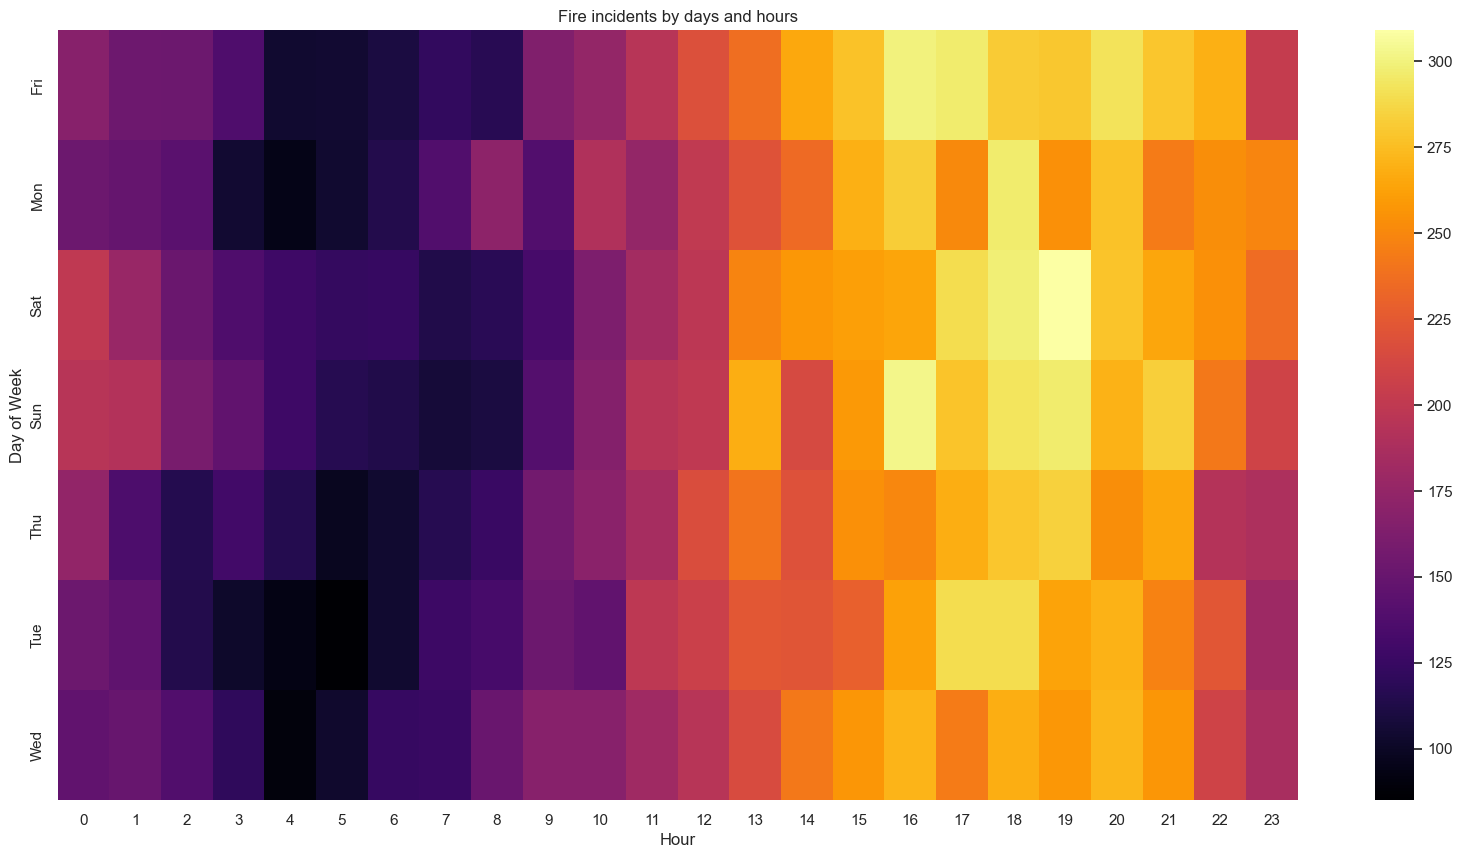

In [20]:
sns.heatmap(dayHour, cmap='inferno')
plt.title("Fire incidents by days and hours")

## Calculate Response Time

In [21]:
#convert tfs-arrival-time to date time to calculate resoponse time
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])
df['Response_Time']=df['TFS_Arrival_Time'] - df['TFS_Alarm_Time']

#convert time to Minute and Seconds
df['Response_Time'] = df['Response_Time'].dt.total_seconds() / 60


In [22]:
average_response_time = df.groupby('Incident_Station_Area')['Response_Time'].mean()
slowest_10_stations = average_response_time.sort_values(ascending=False).head(10).round(3)
slowest_10_stations

Incident_Station_Area
321   14
411   11
431   10
335   10
132    9
421    8
212    8
444    8
344    8
326    8
Name: Response_Time, dtype: float64

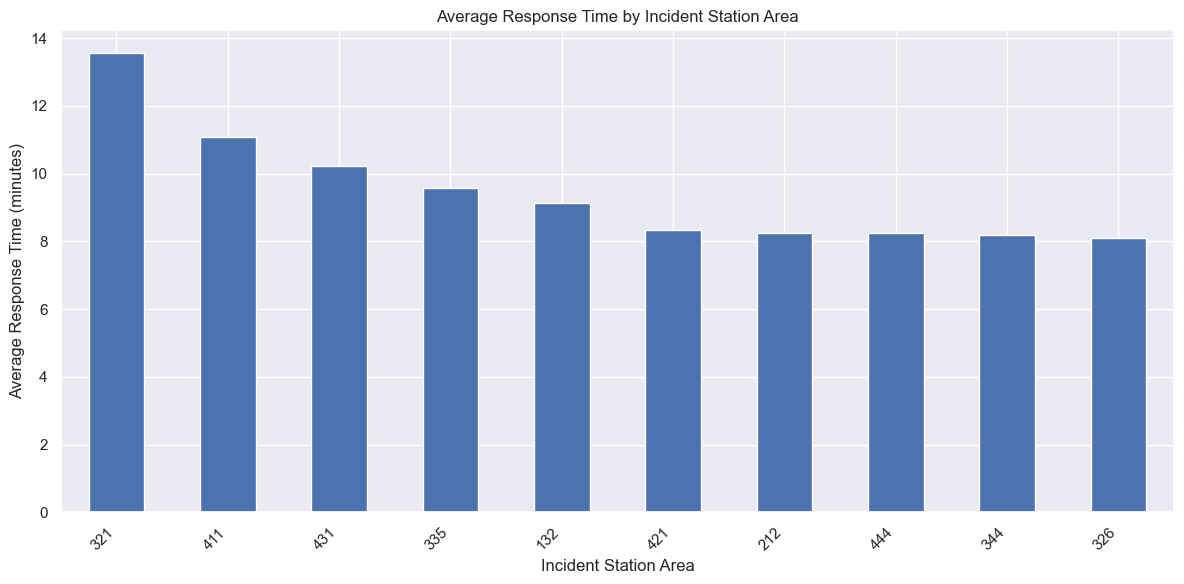

In [23]:
plt.figure(figsize=(12, 6))
slowest_10_stations.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Incident Station Area')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Incident Station Area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


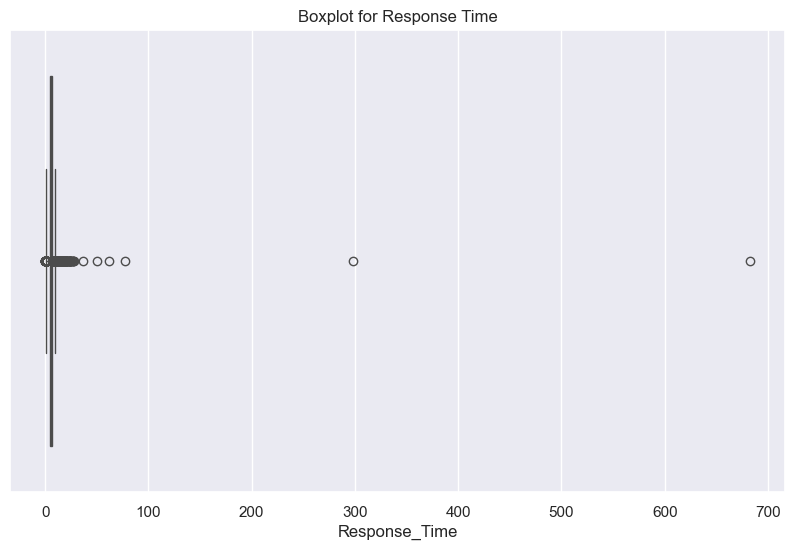

In [24]:
# Plot a boxplot for Response_Time to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Response_Time'])
plt.title('Boxplot for Response Time')
plt.show()

## Top 10 Stations with most incidents

In [25]:
incident_by_station = df['Incident_Station_Area'].value_counts()
top_10_busiest_stations = incident_by_station.sort_values(ascending=False).head(10)
top_10_busiest_stations

Incident_Station_Area
313    1066
314     969
426     928
325     891
332     797
142     709
411     631
333     624
442     602
146     598
Name: count, dtype: int64

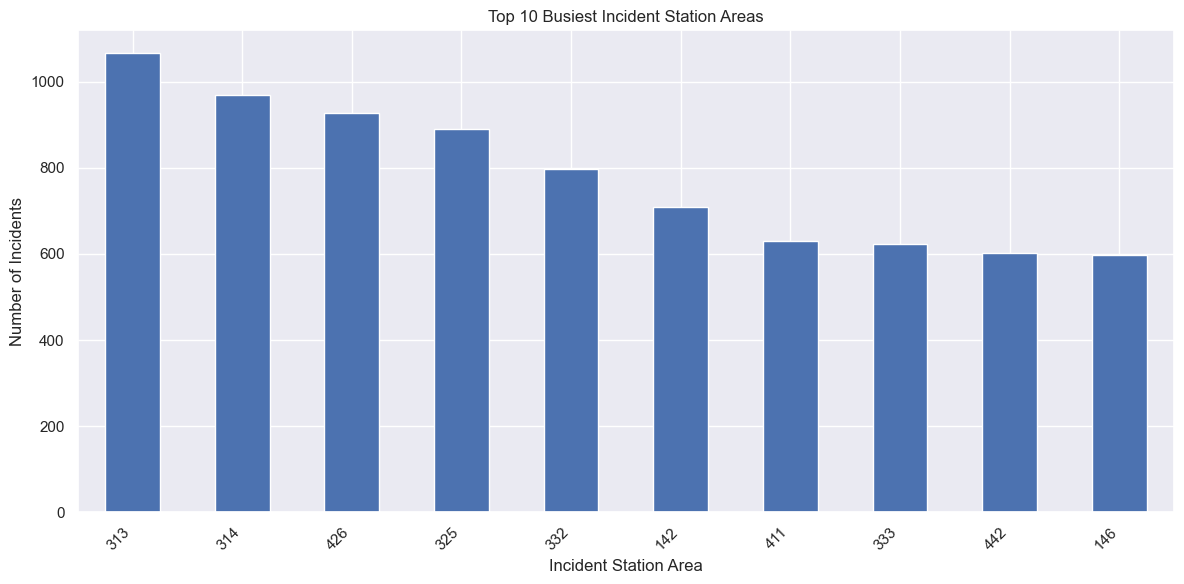

In [26]:
# plot the top 10 busiest stations


plt.figure(figsize=(12, 6))
top_10_busiest_stations.plot(kind='bar')
plt.xlabel('Incident Station Area')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Busiest Incident Station Areas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
property_count = df['Property_Use'].value_counts()
top_10_property_use = property_count.sort_values(ascending=False).head(10)
top_10_property_use

Property_Use
323 - Multi-Unit Dwelling - Over 12 Units                                        5208
301 - Detached Dwelling                                                          4048
896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)    2825
861 - Open Land (eg. light ground cover, bush, grass, etc.)                      2492
901 - Automobile                                                                 2148
848 - Trash/Rubbish/Garbage Container or Dumpster                                1884
302 - Semi-Detached Dwelling                                                     1172
323 - Multi-Unit Dwelling Over 12 Units                                           943
303 - Attached Dwelling (eg. rowhouse, townhouse, etc.)                           847
898 - Other property non structure not classified                                 633
Name: count, dtype: int64

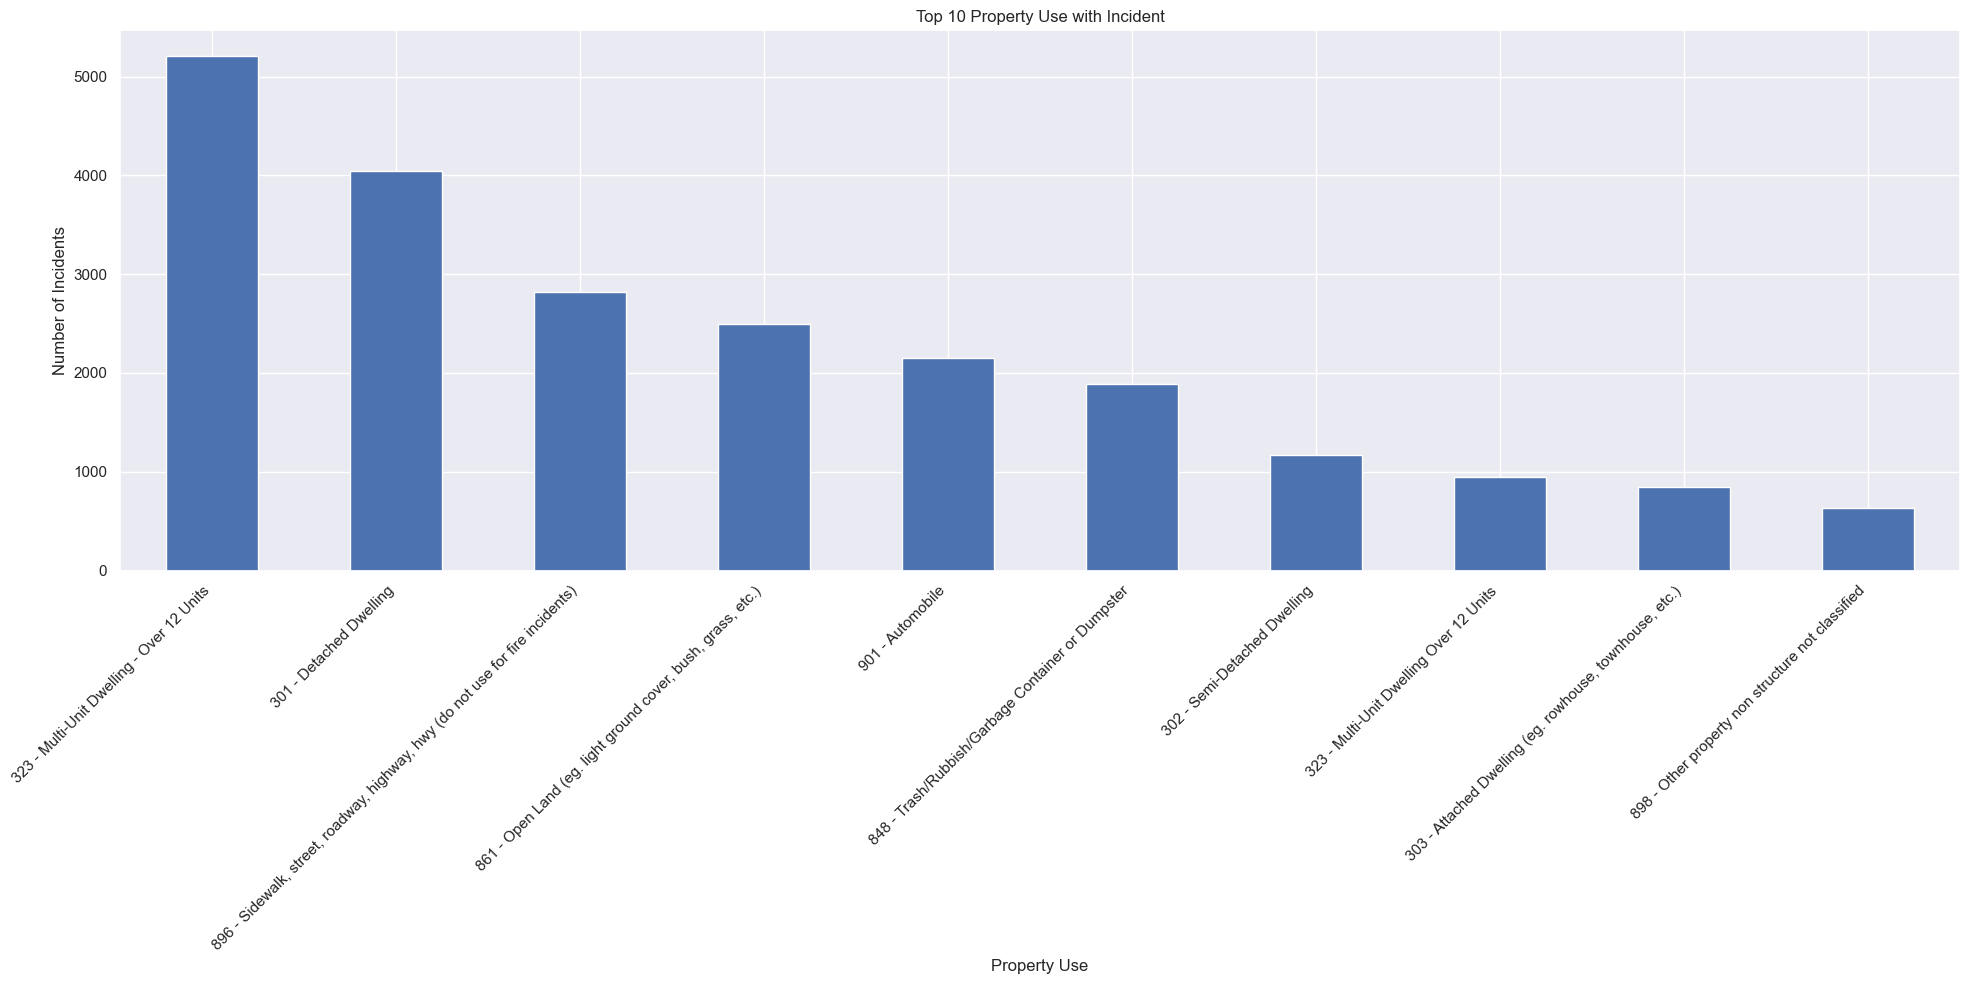

In [28]:
# plot the top 10 property use

plt.figure(figsize=(20, 10))
top_10_property_use.plot(kind='bar')
plt.xlabel('Property Use')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Property Use with Incident')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Value Loss by Station Area

In [29]:
# Calculate the average estimated value loss by incident station
average_value_loss_by_station = df.groupby('Incident_Station_Area')['Estimated_Dollar_Loss'].mean()

top_10_loss_stations = average_value_loss_by_station.sort_values(ascending=False).head(10)
top_10_loss_stations


Incident_Station_Area
                                 500,000
122                              235,119
421                              167,847
144                              131,320
232                               76,695
311                               75,241
441                               72,012
424                               68,085
431                               62,087
111                               59,653
Name: Estimated_Dollar_Loss, dtype: float64

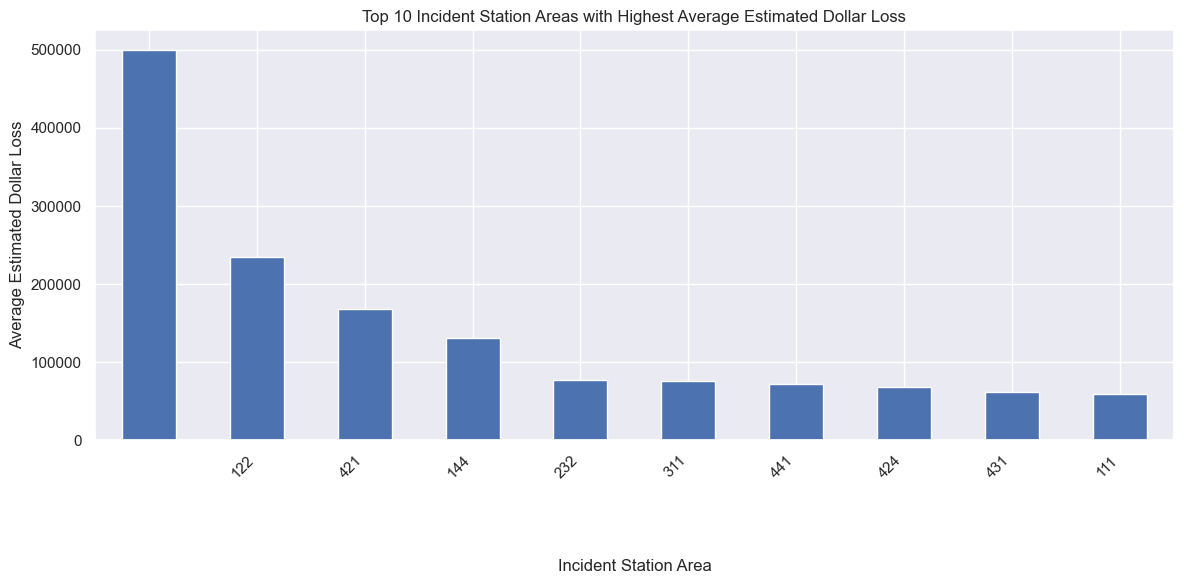

In [30]:
# plot top 10 stations with highest loss

plt.figure(figsize=(12, 6))
top_10_loss_stations.plot(kind='bar')
plt.xlabel('Incident Station Area')
plt.ylabel('Average Estimated Dollar Loss')
plt.title('Top 10 Incident Station Areas with Highest Average Estimated Dollar Loss')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:

# Calculate the average civilian casualties by incident station area
average_casualties_by_station = df.groupby('Incident_Station_Area')['Civilian_Casualties'].mean()

top_10_casualty_stations = average_casualties_by_station.sort_values(ascending=False).head(10)

top_10_casualty_stations




Incident_Station_Area
144   3
421   0
322   0
215   0
234   0
423   0
442   0
422   0
244   0
426   0
Name: Civilian_Casualties, dtype: float64

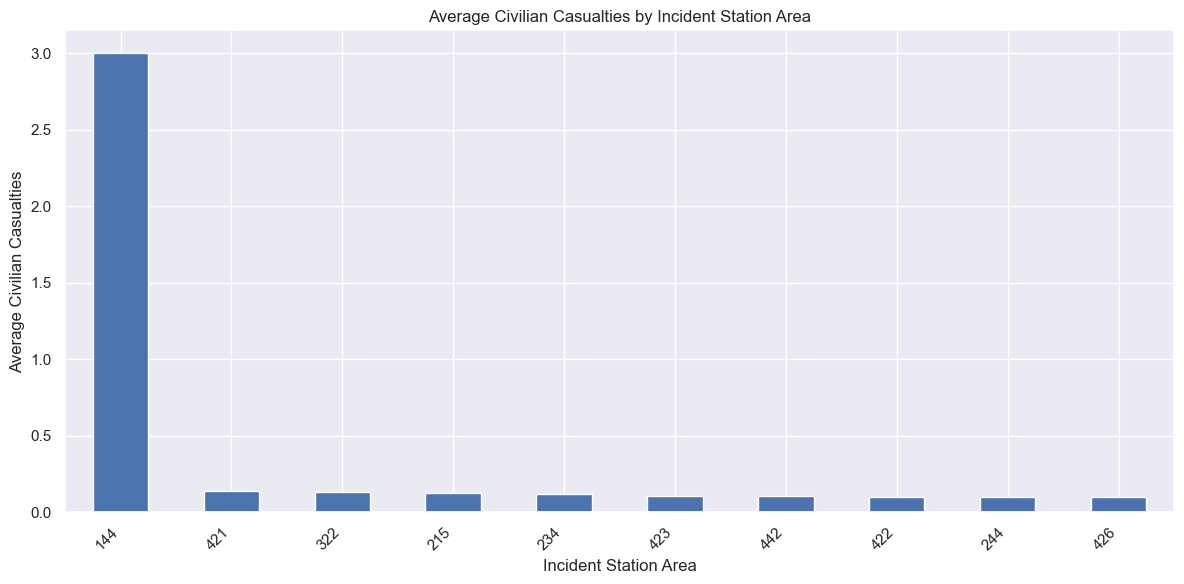

In [32]:
# Plot the average casualties by station area
plt.figure(figsize=(12, 6))
top_10_casualty_stations.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Incident Station Area')
plt.ylabel('Average Civilian Casualties')
plt.title('Average Civilian Casualties by Incident Station Area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
import missingno as msno
df1 = df.drop(['id', ], axis=1)
msno.matrix(df)

KeyError: "['id'] not found in axis"

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
missing_values = df.isnull().sum()

# Create a DataFrame to display the missing values
table1 = pd.DataFrame({'Variable': missing_values.index, 'Count of Missing Values': missing_values.values})

print(table1)


In [ ]:
file_path = "/Users/atharvavyas/Desktop/McGill Academics/AU24/INSY 662/Projectmissing_values_table.csv"
table1.to_csv(file_path, index=False)

In [35]:
# Drop Final_Incident_Type == 03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)
df = pd.read_csv('/Users/atharvavyas/Desktop/McGill Academics/AU24/INSY 662/Project/Fire Incidents Data.csv')
# Assuming `df` is your DataFrame
df = df[df['Final_Incident_Type'] != '03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)']



/var/folders/vv/lxk5p8wx097gv6r501nn13tw0000gn/T/ipykernel_97426/2599387803.py:2: DtypeWarning: Columns (1,2,3,9,10,12,13,14,15,16,18,24,26,27,30,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/atharvavyas/Desktop/McGill Academics/AU24/INSY 662/Project/Fire Incidents Data.csv')


In [36]:
# Identify fires by station

print(df['Final_Incident_Type'].unique())

# Ext_agent_app_or_defer_time can be used to identify how long fire took to subside with "fire_under_control". We can understand how the extent of financial damage is related to this.
# We can also use the time at which the last fire guy 
# 

['01 - Fire'
 '02 - Explosion (including during Fire, excluding Codes 3 & 11-13)']


In [37]:
# Display basic info about dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 24137 entries, 0 to 31204
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   _id                                                            24137 non-null  int64  
 1   Area_of_Origin                                                 23923 non-null  object 
 2   Building_Status                                                16867 non-null  object 
 3   Business_Impact                                                16863 non-null  object 
 4   Civilian_Casualties                                            20219 non-null  float64
 5   Count_of_Persons_Rescued                                       23923 non-null  float64
 6   Estimated_Dollar_Loss                                          23913 non-null  float64
 7   Estimated_Number_Of_Persons_Displaced            

In [38]:
# Descriptive statistics for Estimated_Dollar_Loss
pd.set_option('display.float_format', '{:,.0f}'.format)
print("\nDescriptive Statistics for Estimated Dollar Loss:")
print(df['Estimated_Dollar_Loss'].describe())


Descriptive Statistics for Estimated Dollar Loss:
count       23,913
mean        38,144
std        398,869
min              0
25%            500
50%          4,000
75%         20,000
max     50,000,000
Name: Estimated_Dollar_Loss, dtype: float64


In [39]:
# Check for missing values in key columns
key_columns = ['Estimated_Dollar_Loss', 'Area_of_Origin', 'Level_Of_Origin', 'Extent_Of_Fire', 
               'Fire_Under_Control_Time', 'Ext_agent_app_or_defer_time', 'Fire_Alarm_System_Presence', 
               'Sprinkler_System_Presence', 'Incident_Station_Area', 'Incident_Ward', 
               'Number_of_responding_apparatus', 'Number_of_responding_personnel', 'Possible_Cause']
print("\nMissing Values in Key Columns:")
print(df[key_columns].isnull().sum())
# We know this with the earlier EDA and the MSNO matrix. 


Missing Values in Key Columns:
Estimated_Dollar_Loss              224
Area_of_Origin                     214
Level_Of_Origin                   7274
Extent_Of_Fire                    7274
Fire_Under_Control_Time            227
Ext_agent_app_or_defer_time        220
Fire_Alarm_System_Presence        7273
Sprinkler_System_Presence         7273
Incident_Station_Area                1
Incident_Ward                      117
Number_of_responding_apparatus     213
Number_of_responding_personnel     213
Possible_Cause                     215
dtype: int64


In [40]:
# Group data by Area_of_Origin and calculate mean Estimated_Dollar_Loss for each area
print("\nAverage Estimated Dollar Loss by Area of Origin:")
print(df.groupby('Area_of_Origin')['Estimated_Dollar_Loss'].mean().sort_values(ascending=False))


Average Estimated Dollar Loss by Area of Origin:
Area_of_Origin
990 - Under Investigation                                                   1,770,645
36 - Backstage, dressing room                                                 300,000
91 - Multiple Areas of Origin                                                 175,222
69 - Attic Area                                                               168,730
68 - Concealed Wall Area                                                      163,031
93 - Residential/Business: Other busines area                                 148,978
99 - Undetermined  (formerly 98)                                              147,309
50 - Basement/cellar (not partitioned)                                        145,474
34 - Operating Room, Treatment or Examination Area                            121,035
30 - Sales, Showroom Area                                                     101,503
67 - Concealed Floor Area                                                  

In [60]:
print("\nAverage Estimated Dollar Loss and Count by Area of Origin:")
result = df.groupby('Area_of_Origin')['Estimated_Dollar_Loss'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print(result)


Average Estimated Dollar Loss and Count by Area of Origin:
                                                        mean  count
Area_of_Origin                                                     
990 - Under Investigation                          1,770,645     31
36 - Backstage, dressing room                        300,000      1
91 - Multiple Areas of Origin                        175,222     46
69 - Attic Area                                      168,730     98
68 - Concealed Wall Area                             163,031     39
93 - Residential/Business: Other busines area        148,978     23
99 - Undetermined  (formerly 98)                     147,309    681
50 - Basement/cellar (not partitioned)               145,474    243
34 - Operating Room, Treatment or Examination Area   121,035     10
30 - Sales, Showroom Area                            101,503     49
67 - Concealed Floor Area                             99,571     24
66 - Concealed Ceiling Area                           98

In [69]:
# Analyze property damage by fire extent
print("\nMean and Count of Estimated Dollar Loss by Extent of Fire:")
result = df.groupby('Extent_Of_Fire')['Estimated_Dollar_Loss'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print(result)


Mean and Count of Estimated Dollar Loss by Extent of Fire:
                                                      mean  count
Extent_Of_Fire                                                   
8 - Entire Structure                               785,495    151
6 - Multi unit bldg: spread to separate suite(s)   388,821     56
7 - Spread to other floors, confined to building   365,424    400
11 - Spread beyond building of origin, resulted... 330,078    188
5 - Multi unit bldg: spread beyond suite of ori... 203,181     56
10 - Spread beyond building of origin              175,185     84
4 - Spread beyond room of origin, same floor       154,086    699
3 - Spread to entire room of origin                 81,100    740
9 - Confined to roof/exterior structure             44,903    570
99 - Undetermined                                   40,892    144
2 - Confined to part of room/area of origin         23,748   5976
1 - Confined to object of origin                     8,250   7795


In [71]:
# Analyze property damage by alarm and sprinkler presence
print("\nEstimated Dollar Loss by Fire Alarm System Presence:")
print(df.groupby('Fire_Alarm_System_Presence')['Estimated_Dollar_Loss'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Estimated Dollar Loss by Fire Alarm System Presence:
                                                     mean  count
Fire_Alarm_System_Presence                                      
9 - Undetermined                                   91,341   1894
2 - No Fire alarm system                           53,879   2773
8 - Not applicable (bldg not classified by OBC ... 51,725   2861
1 -  Fire alarm system present                     33,191   9332


In [72]:
# Analyzing property damage by whether there is a sprinkler and how it is
print("\nEstimated Dollar Loss by Sprinkler System Presence:")
print(df.groupby('Sprinkler_System_Presence')['Estimated_Dollar_Loss'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Estimated Dollar Loss by Sprinkler System Presence:
                                       mean  count
Sprinkler_System_Presence                         
3 - No sprinkler system              56,409   9740
9 - Undetermined                     41,874   2690
2 - Partial sprinkler system present 27,939   1835
1 - Full sprinkler system present    25,742   2595


In [73]:
print("\nAverage Estimated Dollar Loss by Ignition Source:")
print(df.groupby('Ignition_Source')['Estimated_Dollar_Loss'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Average Estimated Dollar Loss by Ignition Source:
                                                      mean  count
Ignition_Source                                                  
9990 - Under Investigation                         526,963    129
35 - Fireplace - Factory Built                     223,296     16
94 - Static Electricity (spark)                    197,918     17
21 - Transformer                                   147,964    112
64 - Chemical Processing Equipment (eg. reactor... 146,875      8
100 - Outdoor fireplace/heater                     131,179     23
34 - Space Heater - Portable                       131,014    107
102 - Exposure, source structure semi-detached ... 103,214      7
52 - Florescent Lamp (includes ballast)             82,987     43
95 - Lightning                                      72,408     19
88 - Multiple Ignition Source or Igniting Equip...  70,147     47
74 - Salamander                                     66,250      8
85 - Vehicle collision   

In [74]:
# What type of incident vs Avg. Estimated Dollar Loss
print("\nAverage Estimated Dollar Loss by Final Incident Type:")
print(df.groupby('Final_Incident_Type')['Estimated_Dollar_Loss'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Average Estimated Dollar Loss by Final Incident Type:
                                                     mean  count
Final_Incident_Type                                             
02 - Explosion (including during Fire, excludin... 52,796    141
01 - Fire                                          38,058  23772


In [75]:
# Material first ignited vs Avg est. dollar loss
print("\nAvg. Estimated Dollar Loss by Material First Ignited:")
print(df.groupby('Material_First_Ignited')['Estimated_Dollar_Loss'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Avg. Estimated Dollar Loss by Material First Ignited:
                                                        mean  count
Material_First_Ignited                                             
990 - Under Investigation                          1,736,317     35
79 - Other Flammable, Combustible Liquid             199,388    100
72 - Diesel Fuel/Fuel Oil                            118,601     38
48 - Multiple Objects or Materials                    81,063    316
99 - Undetermined (formerly 98)                       80,384   3115
14 - Interior Wall/Ceiling                            80,311    472
Building Component                                    69,818    263
96 - Multiple diverse objects ignited                 67,912    239
Gases                                                 64,910     28
Miscellaneous                                         60,432   1020
11 - Exterior Roof Covering                           53,464    190
Furniture                                             52,677 

In [76]:
# Smoke_Alarm_at_Fire_Origin_Alarm_Failure
print("\nAvg. Estimated Dollar Loss by Fire alarm working or no:")
print(df.groupby('Smoke_Alarm_at_Fire_Origin_Alarm_Failure')['Estimated_Dollar_Loss'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Avg. Estimated Dollar Loss by Fire alarm working or no:
                                                      mean  count
Smoke_Alarm_at_Fire_Origin_Alarm_Failure                         
99 - Reason for inoperation undetermined           134,189    877
98 - Not applicable: Alarm operated OR presence...  47,799  11819
9 - Other reason                                    40,886    952
7 - Unit failure                                    35,647    242
8 - Tampered with (vandalism)                       28,747     73
3 - Electrical line or battery not connected        26,864    180
2 - Dead battery                                    26,211    204
1 - No battery                                      24,156    245
6 - Improper installation of unit                   23,513     77
5 - Separated from fire (e.g. wall, etc)            21,452    597
4 - Remote from fire – smoke did not reach alarm    10,752   1594


In [77]:
# Smoke_Alarm_at_Fire_Origin_Alarm_Failure
print("\nAvg. Estimated Dollar Loss by Fire alarm working or no:")
print(df.groupby('Smoke_Alarm_at_Fire_Origin_Alarm_Failure')['Civilian_Casualties'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Avg. Estimated Dollar Loss by Fire alarm working or no:
                                                    mean  count
Smoke_Alarm_at_Fire_Origin_Alarm_Failure                       
8 - Tampered with (vandalism)                          0     55
6 - Improper installation of unit                      0     60
7 - Unit failure                                       0    215
99 - Reason for inoperation undetermined               0    765
1 - No battery                                         0    221
2 - Dead battery                                       0    185
3 - Electrical line or battery not connected           0    156
9 - Other reason                                       0    801
98 - Not applicable: Alarm operated OR presence...     0  10084
4 - Remote from fire – smoke did not reach alarm       0   1386
5 - Separated from fire (e.g. wall, etc)               0    503


In [78]:
# Smoke_Alarm_at_Fire_Origin_Alarm_Failure
print("\nAvg. People displaced by Fire alarm working or no:")
print(df.groupby('Smoke_Alarm_at_Fire_Origin_Alarm_Failure')['Estimated_Number_Of_Persons_Displaced'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Avg. People displaced by Fire alarm working or no:
                                                    mean  count
Smoke_Alarm_at_Fire_Origin_Alarm_Failure                       
99 - Reason for inoperation undetermined              37    877
6 - Improper installation of unit                     28     77
3 - Electrical line or battery not connected          20    180
9 - Other reason                                      19    952
98 - Not applicable: Alarm operated OR presence...    16  11822
5 - Separated from fire (e.g. wall, etc)              15    597
2 - Dead battery                                      12    204
4 - Remote from fire – smoke did not reach alarm       8   1594
7 - Unit failure                                       7    242
1 - No battery                                         6    245
8 - Tampered with (vandalism)                          2     73


In [79]:
# Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation
print("\nAvg. People displaced by Fire alarm working or no:")
print(df.groupby('Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation')['Estimated_Number_Of_Persons_Displaced'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Avg. People displaced by Fire alarm working or no:
                                                    mean  count
Smoke_Alarm_Impact_on_Persons_Evacuating_Impact...             
9 - Undetermined                                      29   2096
4 - Alarm operated but failed to alert occupant...    24     44
7 - Not applicable: Occupant(s) first alerted b...    17   4045
1 - All persons (at risk of injury) self evacua...    17   4333
2 - Some persons (at risk) self evacuated as a ...    13   1704
8 - Not applicable: No alarm, no persons present      12   3346
3 - No one (at risk) evacuated as a result of h...     6   1295


In [80]:
# Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation
print("\nAvg. People displaced by Fire alarm working or no:")
print(df.groupby('Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation')['Civilian_Casualties'].agg(['mean', 'count']).sort_values(by='mean', ascending=False))


Avg. People displaced by Fire alarm working or no:
                                                    mean  count
Smoke_Alarm_Impact_on_Persons_Evacuating_Impact...             
4 - Alarm operated but failed to alert occupant...     1     42
2 - Some persons (at risk) self evacuated as a ...     0   1471
9 - Undetermined                                       0   1786
1 - All persons (at risk of injury) self evacua...     0   3742
7 - Not applicable: Occupant(s) first alerted b...     0   3439
3 - No one (at risk) evacuated as a result of h...     0   1103
8 - Not applicable: No alarm, no persons present       0   2848



Estimated Dollar Loss by Sprinkler System Presence:
Exposures
0    38,069
1   176,903
2   360,820
3   164,878
4   234,556
5   170,000
6   366,750
7   100,000
Name: Estimated_Dollar_Loss, dtype: float64


Text(0.5, 1.0, 'Average Estimated Dollar Loss by Exposures')

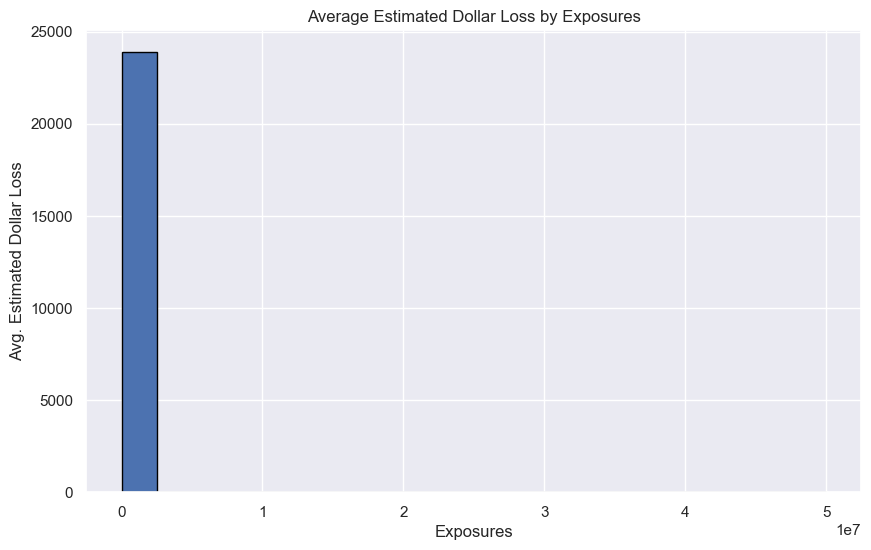

In [52]:
import seaborn as sns
print("\nEstimated Dollar Loss by Sprinkler System Presence:")
print(df.groupby('Exposures')['Estimated_Dollar_Loss'].mean())
# Make a histogram of this
plt.figure(figsize=(10, 6))
plt.hist(df['Estimated_Dollar_Loss'], bins=20, edgecolor='black')
plt.xlabel('Exposures')
plt.ylabel('Avg. Estimated Dollar Loss')
plt.title('Average Estimated Dollar Loss by Exposures')

In [53]:
import pandas as pd

# Load data
# data = pd.read_csv('toronto_fire_dataset.csv')  # Uncomment and specify file path

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['_id', 'Civilian_Casualties', 'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced', 'Exposures', 'Incident_Ward', 'Latitude', 'Longitude', 'Number_of_responding_apparatus', 'Number_of_responding_personnel', 'TFS_Firefighter_Casualties']


Correlation Matrix:
                                       Civilian_Casualties  \
Civilian_Casualties                                      1   
Count_of_Persons_Rescued                                 0   
Estimated_Dollar_Loss                                    0   
Estimated_Number_Of_Persons_Displaced                    0   
Exposures                                               -0   
Incident_Ward                                           -0   
Latitude                                                -0   
Longitude                                               -0   
Number_of_responding_apparatus                           0   
Number_of_responding_personnel                           0   
TFS_Firefighter_Casualties                               0   

                                       Count_of_Persons_Rescued  \
Civilian_Casualties                                           0   
Count_of_Persons_Rescued                                      1   
Estimated_Dollar_Loss             

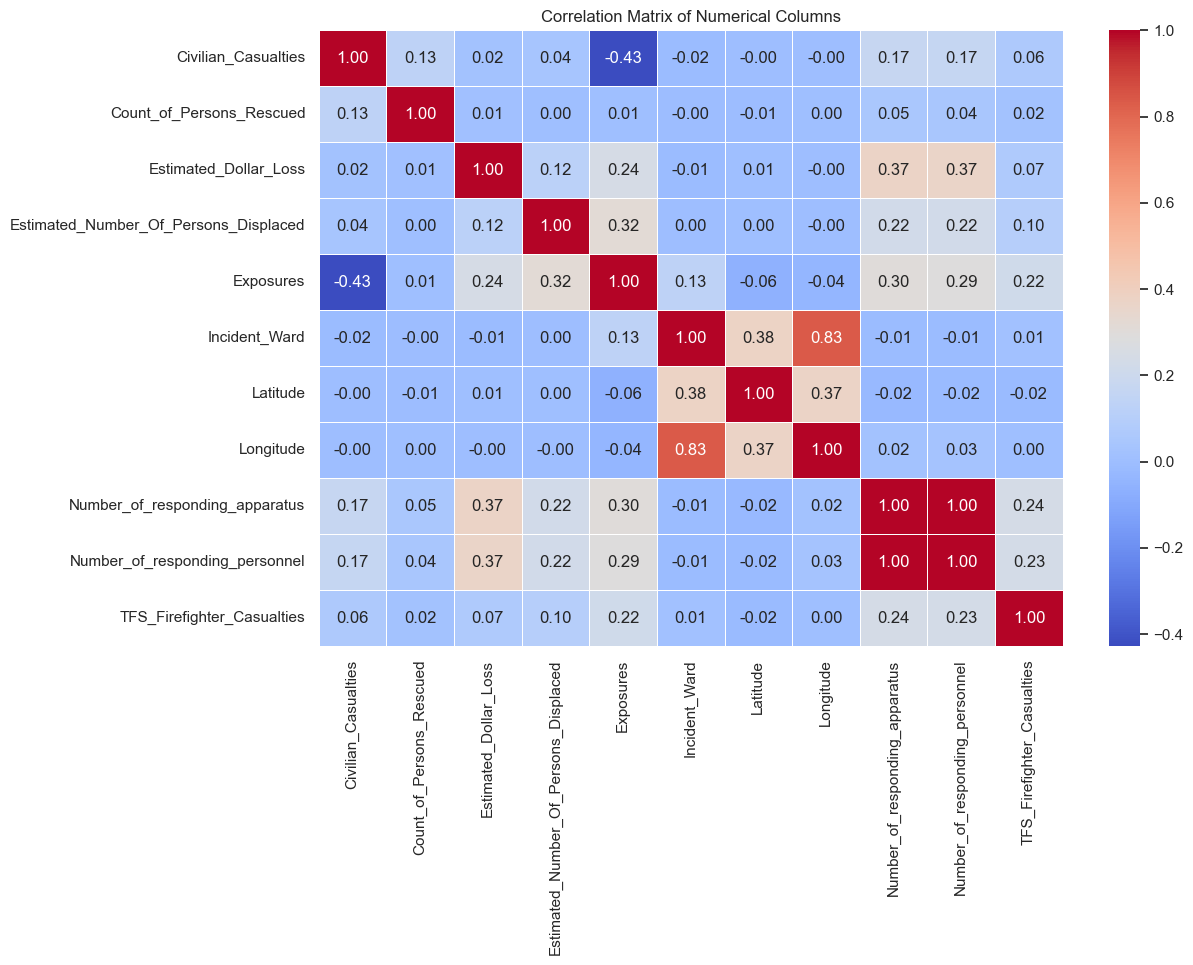

In [54]:
# Select only the numerical columns
numerical_data = df.select_dtypes(include=['number']).drop(columns=['_id'], errors='ignore')

# Calculate correlation matrix on numerical data only
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [55]:
df.head()


,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,3399984,990 - Under Investigation,01 - Normal (no change),5 - May not resume operations,0,0,"50,000,000",800,NaN,2019-05-07T03:34:02,...,99 - Reason for inoperation undetermined,9 - Type undetermined,9 - Undetermined,8 - Entire Structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,3 - Fire with smoke showing only - including v...,2019-05-07T03:24:09,2019-05-07T03:29:48,0
1,3420340,99 - Undetermined (formerly 98),03 - Under Construction,1 - No business interruption,0,0,"15,000,000",0,NaN,2021-10-05T22:06:54,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,9 - Undetermined,10 - Spread beyond building of origin,9 - Activation/operation undetermined,9 - Undetermined,"7 - Fully involved (total structure, vehicle, ...",2021-10-05T21:59:32,2021-10-05T22:05:39,0
2,3411787,83 - Electrical Systems,08 - Not Applicable,9 - Undetermined,0,0,"13,000,000",0,NaN,2011-03-18T17:05:00,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,9 - Unclassified,2011-03-18T16:49:47,2011-03-18T16:55:59,0
3,3411482,50 - Basement/cellar (not partitioned),01 - Normal (no change),9 - Undetermined,0,0,"10,000,000",0,NaN,2017-02-11T05:18:09,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",8 - Entire Structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,3 - Fire with smoke showing only - including v...,2017-02-11T05:07:31,2017-02-11T05:12:13,0
4,3411499,"52 - HVAC Equipment Room (furnace room, water ...",01 - Normal (no change),5 - May not resume operations,0,0,"10,000,000",100,NaN,2017-02-14T09:29:00,...,98 - Not applicable: Alarm operated OR presenc...,4 - Interconnected,1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,9 - Undetermined,2 - Fire with no evidence from street,2017-02-14T09:22:30,2017-02-14T09:26:23,0
